2023-01-17 <br/>
Art history data <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-01-17/readme.md

Waffle Chart - Completed 

https://towardsdatascience.com/2-efficient-ways-of-creating-fancy-pictogram-charts-in-python-8b77d361d500
https://blog.matteoferla.com/2019/10/pictograms-with-plotly-and-fontawesome.html 

In [15]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-17/artists.csv')
df.head()

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White


In [32]:
df.artist_race.nunique()

5

In [33]:
df.artist_race.unique()

array(['Black or African American', 'White', 'Asian',
       'Native Hawaiian or Other Pacific Islander', nan,
       'American Indian or Alaska Native'], dtype=object)

In [62]:
df_grouped = df.groupby(["artist_race"], as_index=False).agg(total_paintings=("artist_name","count")).set_index('artist_race', inplace=False)
df_grouped

,total_paintings
artist_race,
American Indian or Alaska Native,12
Asian,79
Black or African American,83
Native Hawaiian or Other Pacific Islander,23
White,2936


In [64]:
#Waffle chart was extremely skewed, removing most prevalent value 
df_grouped.drop(index="White",inplace=True)
df_grouped


,total_paintings
artist_race,
American Indian or Alaska Native,12
Asian,79
Black or African American,83
Native Hawaiian or Other Pacific Islander,23


In [65]:
ds= df_grouped.squeeze()
ds

artist_race
American Indian or Alaska Native             12
Asian                                        79
Black or African American                    83
Native Hawaiian or Other Pacific Islander    23
Name: total_paintings, dtype: int64

In [79]:
title = 'Art Brought ot Life by Minorities'


colors_list = ['slateblue', 'limegreen', 'red', 'grey','orange']

colors = {ds.index[i]:colors_list[i] for i in range(len(ds))}

Xlim = 18
Ylim = 11
Xpos = 0
Ypos = 10 ##change to zero for upwards
series = []
for name, count in ds.iteritems():
    x = []
    y = []
    for j in range(0, count):
        if Xpos == Xlim:
            Xpos = 0
            Ypos -= 1
        x.append(Xpos)
        y.append(Ypos)
        Xpos += 1
        trace = go.Scatter(x=x,
        y=y,
        mode="text",
        text='\uf1fc',
        textposition="middle center",
        fillcolor= "rgba(0,1,0,0)",
        textfont={"family": "FontAwesome",
        "size": 18,
        "color":colors[name],
        },
        name=f'{name} ({count})',
        hovertemplate=f'{name} ({count})',
        )
    series.append(trace)


fig = go.Figure(dict(data=series, layout=go.Layout(
title={'text': title, 'x': 0.5, 'xanchor': 'center'},
paper_bgcolor='rgba(255,255,255,1)',
plot_bgcolor='rgba(0,0,0,0)',
xaxis=dict(showgrid=False,zeroline= False, showline=False, visible=False, showticklabels=False),
yaxis=dict(showgrid=False,zeroline= False, showline=False, visible=False, showticklabels=False),
)))

fig

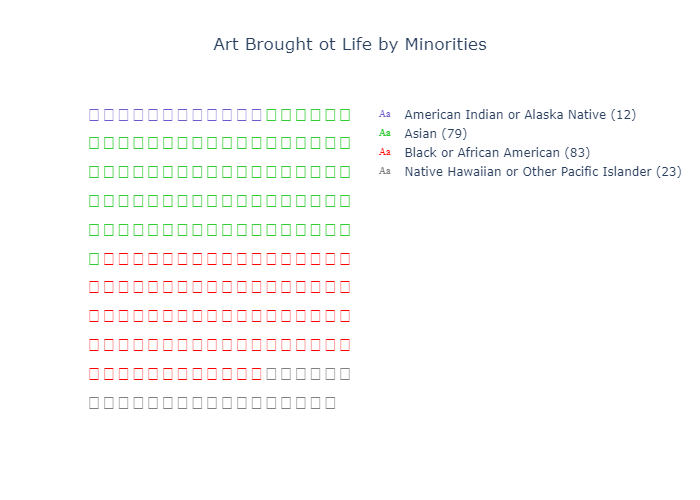

In [82]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)